# Виды признаков

В машинном обучении данные обычно делятся на несколько типов:

- Категориальные признаки: Эти признаки представляют категории или классы.
    Например:
    - Цвет автомобиля (красный, зеленый, синий)
    - Тип жилья (квартира, дом, студия)
    - Пол (мужской, женский)
    
Категориальные данные часто делятся на:

- Номинальные: Нет естественного порядка между значениями. Например, цвет или пол.
- Порядковые: Существует естественный порядок. Например, уровень образования (начальное, среднее, высшее).
- Непрерывные признаки: Это количественные данные, которые могут принимать любое значение в определенном диапазоне. Например:
    - Возраст
    - Вес
    - Температура
    - Обработка категориальных данных

Категориальные данные необходимо преобразовать перед использованием в большинстве алгоритмов машинного обучения. Существуют различные методы:

- One-Hot Encoding: Каждая категория преобразуется в новый столбец, где 1 обозначает наличие категории, а 0 — ее отсутствие.
- Label Encoding: Каждой категории присваивается уникальный номер. Этот метод хорош для порядковых данных, но может ввести ложное понятие порядка в номинальных данных.
- Binary Encoding: Пеобразует категории в двоичный код. Это уменьшает количество новых столбцов по сравнению с One-Hot Encoding и устраняет проблему с ложным порядком, присущим Label Encoding.
- Frequency Encoding: Заменяет категории на их частоту встречаемости в данных.
- Target Encoding: Заменяет категории на среднее значение целевой переменной для каждой категории. Это особенно полезно, когда категориальные признаки имеют много уникальных значений.

## One-hot encoding

На практике часто используется one-hot encoding. Вместо одного категориального признака $X$ создается набор бинарных категориальных признаков, которые отвечают на вопрос $X == C$, где $C$ перебирает все возможные значения категориального признака.

Теперь, чтобы выбрать конкретное значение категориального признака, дереву решений достаточно задать один вопрос.

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/one_hot_encoding.png" width="450">

У такой схемы есть ряд недостатков:

1. Мы получаем линейно зависимые признаки. Это может плохо влиять на некоторые модели. Например, в линейных моделях линейная зависимость признаков приводит к тому, что решение оптимизационной задачи (результат подбора весов) может быть не уникальным и сколь угодно большим по модулю, что негативно сказывается на работе модели. Подробнее об этом можно почитать по [ссылке](https://inmachineswetrust.com/posts/drop-first-columns/).

<img src ="https://edunet.kea.su/repo/EduNet-content/L04/out/problem_of_ohe.png" width="850">

Поэтому одну из категорий могут исключить при кодировании. Например, в примере выше можно исключить **Рыбу**, ведь если все три других признака-категории равны 0, то точно верно, что категория — **Рыба**.

2. При использовании one-hot encoding один категориальный признак может преобразовываться в десятки бинарных признаков. При использовании случайного леса выбирается случайное подмножество признаков. Преобразованные во множество бинарных, категориальные признаки будут встречаться чаще, чем вещественные, что может привести к тому, что значимость категориальных признаков будет завышена.

Создание метода вручную:

In [1]:
from numpy import argmax
import numpy as np

# define input string
data = 'hello world'
print(data)
print()

# define universe of possible input values
alphabet = 'abcdefghijklmnopqrstuvwxyz '

# enumerate the alphabet
print(list(enumerate(alphabet)))
print()

# define a mapping of chars to integers by dictionary
int_to_char = dict(enumerate(alphabet))
char_to_int = dict(zip(int_to_char.values(), int_to_char.keys()))

# integer encode input data
integer_encoded = [ char_to_int[letter] for letter in data]
print(integer_encoded)
print()

# one hot encode
onehot_encoded = list()
for value in integer_encoded:
    letter = np.zeros(len(alphabet), dtype = int)
    letter[value] = 1
    onehot_encoded.append(list(letter))
print(onehot_encoded)

# invert encoding
inverted = int_to_char[argmax(onehot_encoded[0])]
print(inverted)

hello world

[(0, 'a'), (1, 'b'), (2, 'c'), (3, 'd'), (4, 'e'), (5, 'f'), (6, 'g'), (7, 'h'), (8, 'i'), (9, 'j'), (10, 'k'), (11, 'l'), (12, 'm'), (13, 'n'), (14, 'o'), (15, 'p'), (16, 'q'), (17, 'r'), (18, 's'), (19, 't'), (20, 'u'), (21, 'v'), (22, 'w'), (23, 'x'), (24, 'y'), (25, 'z'), (26, ' ')]

[7, 4, 11, 11, 14, 26, 22, 14, 17, 11, 3]

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Использование готовых реализаций:

In [2]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(-1, 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


# Мешок слов (Bag of Words)

Модель текстов на естественном языке, в которой каждый документ или текст выглядит как неупорядоченный набор слов без сведений о связях между ними. Его можно представить в виде матрицы, каждая строка в которой соответствует отдельному документу или тексту, а каждый столбец — определенному слову. Ячейка на пересечении строки и столбца содержит количество вхождений слова в соответствующий документ.

Для подготовки Мешка слов можно воспользоваться возможностями пакета tm. Этот пакет в качестве объекта работает с так называемым лингвистическим корпусом первого порядка — коллекцией текстов, объединенных общим признаком. В задаче про классификацию рецензий на фильмы, все тексты - это обзоры фильмов. Для того чтобы составить корпус сначала нужно преобразовать тексты в вектор, каждый элемент которого представляет отдельный документ. А потом построить на базе корпуса матрицу «документ-термин». Она и станет мешком слов.

Вот так выглядел фрагмент Мешка с наиболее часто употребляемыми словами:

In [3]:
Docs act actor actual also anoth  back bad  best better can
    1   0     0      1    2     1    0   3    0      0   1
    2   0     0      0    0     0    0   0    0      0   1
    3   0     1      0    0     0    0   1    0      1   0
    4   0     1      0    1     2    0   0    0      0   1

SyntaxError: ignored

# Bag of Words или Word Embeddings?

В некоторых случаях использование BoW может быть предпочтительнее использования Word Embedding. Например:
- При построении не очень сложных моделей проще воспользоваться готовой библиотекой scikit-learn, что займёт всего несколько строк кода вместо использования методов Deep Learning для построения Embedding.
- Если Вы работаете с небольшим набором данных, в которых специфический контекст, BoW может справиться лучше Word Embedding. Контекст сильно зависит от предметной области, что может привести к тому, что не всегда можно будет найти соответствующий вектор из предварительно обученных моделей (GloVe, fastText etc).

Разберём три основных метода по построению BoW с ипользованием готовых библиотек.

In [5]:
import collections
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [6]:
from sklearn.datasets import fetch_20newsgroups
train_raw_df = fetch_20newsgroups(subset='train')

In [7]:
x_train = train_raw_df.data
y_train = train_raw_df.target

## Подсчёт частоты встречаемости слова

Основная идея заключается в том, что важные слова (или сигналы) встречаются чаще остальных. То есть высокая частота встречаемости подразумевает большую важность слова.  

In [8]:
doc = "In the-state-of-art of the NLP field, Embedding is the \
success way to resolve text related problem and outperform \
Bag of Words ( BoW ). Indeed, BoW introduced limitations \
large feature dimension, sparse representation etc."

count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform([doc])
count_occur_df = pd.DataFrame((count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names_out()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()

,Word,Count
16,of,3
26,the,3
3,bow,2
0,and,1
28,way,1


### Нормализованная частота встречаемости

Чтобы максимальное значение частоты <<не забивало>> остальные значения, применяется нормализация.

In [9]:
doc = "In the-state-of-art of the NLP field, Embedding is the \
success way to resolve text related problem and outperform \
Bag of Words ( BoW ). Indeed, BoW introduced limitations \
large feature dimension, sparse representation etc."

norm_count_vec = TfidfVectorizer(use_idf=False, norm='l2')
norm_count_occurs = norm_count_vec.fit_transform([doc])
norm_count_occur_df = pd.DataFrame((count, word) for word, count in zip(
    norm_count_occurs.toarray().tolist()[0], norm_count_vec.get_feature_names_out()))
norm_count_occur_df.columns = ['Word', 'Count']
norm_count_occur_df.sort_values('Count', ascending=False, inplace=True)
norm_count_occur_df.head()

,Word,Count
16,of,0.428571
26,the,0.428571
3,bow,0.285714
0,and,0.142857
28,way,0.142857


### TF-IDF
[Статья на Хабр]('https://habr.com/ru/companies/otus/articles/755772/')

Term Frequency-Inverse Document Frequency (TF-IDF) — это один из наиболее распространенных и мощных методов для извлечения признаков из текстовых данных. TF-IDF вычисляет важность каждого слова в документе относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного документа в контексте всей коллекции.

In [10]:
doc = "In the-state-of-art of the NLP field, Embedding is the \
success way to resolve text related problem and outperform \
Bag of Words ( BoW ). Indeed, BoW introduced limitations \
large feature dimension, sparse representation etc."

tfidf_vec = TfidfVectorizer()
tfidf_count_occurs = tfidf_vec.fit_transform([doc])
tfidf_count_occur_df = pd.DataFrame((count, word) for word, count in zip(
    tfidf_count_occurs.toarray().tolist()[0], tfidf_vec.get_feature_names_out()))
tfidf_count_occur_df.columns = ['Word', 'Count']
tfidf_count_occur_df.sort_values('Count', ascending=False, inplace=True)
tfidf_count_occur_df.head()

,Word,Count
16,of,0.428571
26,the,0.428571
3,bow,0.285714
0,and,0.142857
28,way,0.142857


### Preprocessing

In [11]:
stop_words = ['a', 'an', 'the']

# Basic cleansing
def cleansing(text):
    global stop_words
    # Tokenize: splitting by spaces
    tokens = text.lower().split()
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# All-in-one preproce
def preprocess_x(x):
    processed_x = [cleansing(text) for text in x]
    return processed_x

def build_model(mode):
    # Intent to use default paramaters for show case
    vect = None
    if mode == 'count':
        vect = CountVectorizer()
    elif mode == 'tf':
        vect = TfidfVectorizer(use_idf=False, norm='l2')
    elif mode == 'tfidf':
        vect = TfidfVectorizer()
    else:
        raise ValueError('Mode should be either count or tfidf')

    return Pipeline([
        ('vect', vect),
        ('clf' , LogisticRegression(solver='newton-cg',n_jobs=-1))
    ])

def pipeline(x, y, mode):
    processed_x = preprocess_x(x)

    model_pipeline = build_model(mode)
    cv = KFold(n_splits=5, shuffle=True)

    scores = cross_val_score(model_pipeline, processed_x, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

    return model_pipeline

Проверим, какой номер словаря нам необходим:

In [12]:
x = preprocess_x(x_train)
y = y_train

model_pipeline = pipeline(x, y, mode='count')
model_pipeline.fit(x, y)

print('Number of Vocabulary: %d'% (len(model_pipeline.named_steps['vect'].get_feature_names_out())))

Accuracy: 0.8777 (+/- 0.0169)
Number of Vocabulary: 130107


# Pipeline

In [13]:
print('Using Count Vectorizer------')
model_pipeline = pipeline(x, y, mode='count')

print('Using TF Vectorizer------')
model_pipeline = pipeline(x, y, mode='tf')

print('Using TF-IDF Vectorizer------')
model_pipeline = pipeline(x, y, mode='tfidf')

Using Count Vectorizer------
Accuracy: 0.8783 (+/- 0.0112)
Using TF Vectorizer------
Accuracy: 0.8081 (+/- 0.0279)
Using TF-IDF Vectorizer------
Accuracy: 0.8925 (+/- 0.0124)


# Embedding

[Хорошая статья на Хабр, полный текст](https://habr.com/ru/companies/ods/articles/329410/)

Визуализация векторов embedding: http://projector.tensorflow.org

Embedding — сопоставление произвольной сущности (например, узла в графе или кусочка картинки) некоторому вектору.

В конце XIX века высказал известный лингвист Фердинанд де Соссюр высказал гипотезу о том, что буквенное написание слова никак не связано с его смыслом.

Слова “петух”, “курица” и “цыпленок” имеют очень мало общего между собой и стоят в словаре далеко друг от друга, хотя очевидно обозначают самца, самку и детеныша одного вида птицы. То есть можно выделить два вида близости слов: лексический и семантический. Как мы видим на примере с курицей, эти близости не обязательно совпадают. Можно для наглядности привести обратный пример лексически близких, но семантически далеких слов — "зола" и "золото".

Чтобы получить возможность представить семантическую близость, было предложено использовать embedding, то есть сопоставить слову некий вектор, отображающий его значение в “пространстве смыслов”.


In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [15]:
import seaborn as sns

In [16]:
s = ['Mars has an athmosphere', "Saturn 's moon Titan has its own athmosphere",
     'Mars has two moons', 'Saturn has many moons', 'Io has cryo-vulcanoes']
dic = {}
for sent in s:
    words = sent.split()
    for w in words:
        if w not in dic:
            dic[w] = {}
        for w2 in words:
            dic[w][w2] = 1

In [17]:
df = pd.DataFrame(dic)
df.fillna(0, inplace=True)
df

,Mars,has,an,athmosphere,Saturn,'s,moon,Titan,its,own,two,moons,many,Io,cryo-vulcanoes
Mars,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
has,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
an,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
athmosphere,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
two,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
moons,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
Saturn,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
's,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
moon,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Titan,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.shape

(15, 15)

In [19]:
pca = PCA()
res = pca.fit_transform(df)

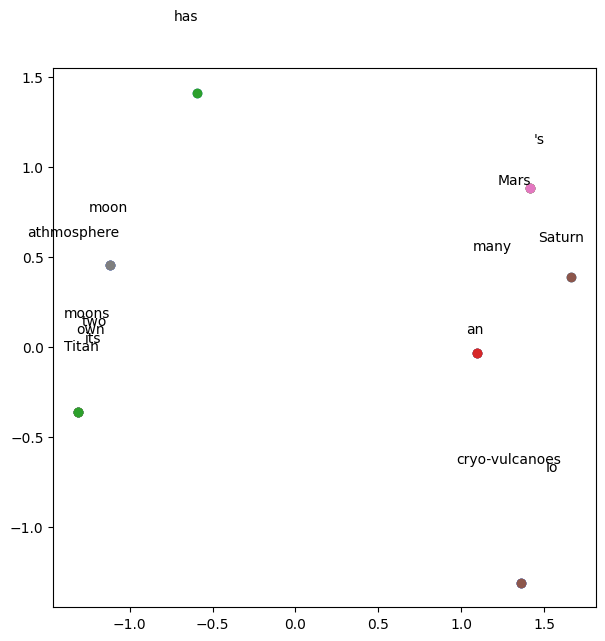

In [20]:
plt.figure(figsize=(7,7))
plt.scatter(res[:,0], res[:,1])
for i, label in enumerate(df):

    x, y = res[i,0], res[i,1]
    plt.scatter(x, y)
    kek = {'has': (1, 50), 'is': (1, 5)}
    plt.annotate(label, xy=(x, y), xytext=kek.get(label,(1+i*2, 6*i)), textcoords='offset points',
                   ha='right', va='bottom', )

### Проблемы Embedding
Технология эмбединга - одно из самых замечательных изобретений последнего десятилетия. Однако, с ней связан также ряд проблем.

* Для получения надёжных контекстных векторов редких слова требуется очень большой корпус текстов. Однако, в большом корпусе может происходить перекос в семантических значениях слов по сравнению с их харатерными обыденными значениями. Например при векторизации GloVe для слова apple получаем следующих ближайших соседей: microsoft(.26), ibm (.32), intel(.32), software(.32), dell (.33). В тоже время существенно меньший корпус ROC Stories выдаёт более "обыденных соседей" для apple.

* Простой эмбединг не учитывает семантической и синтаксической неоднозначности. Обычно предполагается, что семантическая неоднозначность снимается, после прохождения исходных векторов слов через несколько слоёв нейронной сети, в которых анализируется контекст всего предложения (архитектуры RNN или Attention). Например, общий контекст предложений "Remove first row of the table." и "Put an apple on the table" позволяет в каждом случае уточнить семантическое значение слова table.

* Так как слова в векторном пространстве являются точками, а не протяжёнными областями, эмбединг не отражает иерархической природы смыслов: предмет - инструмент - молоток.

И тогда, как это часто бывает, был предложен выход по принципу “тот, кто нам мешает, тот нам поможет!” А именно, в 2013 году тогда мало кому известный чешский аспирант Томаш Миколов предложил свой подход к word embedding, который он назвал word2vec. Его подход основан на другой важной гипотезе, которую в науке принято называть гипотезой локальности — “слова, которые встречаются в одинаковых окружениях, имеют близкие значения”. Близость в данном случае понимается очень широко, как то, что рядом могут стоять только сочетающиеся слова. Например, для нас привычно словосочетание "заводной будильник". А сказать “заводной апельсин” мы не можем* — эти слова не сочетаются.

# word2vec и  skip-gram

Оригинальная статья: https://arxiv.org/pdf/1301.3781.pdf

Статья на Хабр: https://habr.com/ru/companies/ods/articles/329410/

В 2013 году тогда мало кому известный чешский аспирант Томаш Миколов предложил свой подход к word embedding, который он назвал word2vec. Его подход основан на другой важной гипотезе, которую в науке принято называть гипотезой локальности — “слова, которые встречаются в одинаковых окружениях, имеют близкие значения”. Близость в данном случае понимается очень широко, как то, что рядом могут стоять только сочетающиеся слова. Например, для нас привычно словосочетание "заводной будильник". А сказать “заводной апельсин” мы не можем — эти слова не сочетаются.

Основываясь на этой гипотезе Томаш Миколов предложил новый подход, который не страдал от больших объемов информации, а наоборот выигрывал.

Модель, предложенная Миколовым очень проста (и потому так хороша) — мы будем предсказывать вероятность слова по его окружению (контексту). То есть мы будем учить такие вектора слов, чтобы вероятность, присваиваемая моделью слову была близка к вероятности встретить это слово в этом окружении в реальном тексте.

$$P(w_o| w_c)=\frac{e^{s(w_o, w_c)}}{\sum_{w_i \in V} e^{s(w_i, w_c)}}$$


Здесь $w_o$ — вектор целевого слова, $w_c$ — это некоторый вектор контекста, вычисленный (например, путем усреднения) из векторов окружающих нужное слово других слов. А $s(w_1, w_2)$ — это функция, которая двум векторам сопоставляет одно число. Например, это может быть упоминавшееся выше косинусное расстояние.

Приведенная формула называется softmax, то есть “мягкий максимум”, мягкий — в смысле дифференцируемый. Это нужно для того, чтобы наша модель могла обучиться с помощью backpropagation, то есть процесса обратного распространения ошибки.

Процесс тренировки устроен следующим образом: мы берем последовательно (2k+1) слов, слово в центре является тем словом, которое должно быть предсказано. А окружающие слова являются контекстом длины по k с каждой стороны. Каждому слову в нашей модели сопоставлен уникальный вектор, который мы меняем в процессе обучения нашей модели.

В целом, этот подход называется CBOW — continuous bag of words, continuous потому, что мы скармливаем нашей модели последовательно наборы слов из текста, a BoW потому что порядок слов в контексте не важен.

Также Миколовым сразу был предложен другой подход — прямо противоположный CBOW, который он назвал skip-gram, то есть “словосочетание с пропуском”. Мы пытаемся из данного нам слова угадать его контекст (точнее вектор контекста). В остальном модель не претерпевает изменений.

Что стоит отметить: хотя в модель не заложено явно никакой семантики, а только статистические свойства корпусов текстов, оказывается, что натренированная модель word2vec может улавливать некоторые семантические свойства слов. Классический пример из работы автора:

<img src = 'https://habrastorage.org/r/w1560/getpro/habr/post_images/9dd/1dc/5ea/9dd1dc5eabaa9a645a12a0a272dd5769.png'>

Слово "мужчина" относится к слову "женщина" так же, как слово "дядя" к слову "тётя", что для нас совершенно естественно и понятно, но в других моделям добиться такого же соотношения векторов можно только с помощью специальных ухищрений. Здесь же — это происходит естественно из самого корпуса текстов. Кстати, помимо семантических связей, улавливаются и синтаксические, справа показано соотношение единственного и множественного числа.

word2vec — способ построения сжатого пространства векторов слов, использующий нейронные сети. Принимает на вход большой текстовый корпус и сопоставляет каждому слову вектор.

Сначала он создает словарь, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, имеющие схожий смысл), в векторном представлении имеют высокое косинусное сходство.

<img src = 'https://neerc.ifmo.ru/wiki/images/thumb/e/e1/Words-space.png/1600px-Words-space.png'>


Стоит отметить модель, предложенную лабораторией компьютерной лингвистики Стенфордского университета, под названием [Global Vectors (GloVe)](https://nlp.stanford.edu/projects/glove/), сочетающую в себе черты SVD разложения и word2vec

# Использование модели GloVe дл работы с векторами

GloVe тесно ассоциируется с Word2Vec: алгоритмы появились примерно в одно и то же время и опираются на интерпретируемость векторов слов. Модель GloVe пытается решить проблему эффективного использования статистики совпадений. GloVe минимизирует разницу между произведением векторов слов и логарифмом вероятности их совместного появления с помощью стохастического градиентного спуска. Полученные представления отражают важные линейные подструктуры векторного пространства слов: получается связать вместе разные спутники одной планеты или почтовый код города с его названием.

В Word2Vec частота совместной встречаемости слов не имеет большого значения, она лишь помогает генерировать дополнительные обучающие выборки. GloVe учитывает совместную встречаемость, а не полагается только на контекстную статистику. Векторы слов группируются вместе на основе их глобальной схожести.

Преимущества:

- Простая архитектура без нейронной сети.
- Модель быстрая, и этого может быть достаточно для простых приложений.
- GloVe улучшает Word2Vec. Она добавляет частоту встречаемости слов и опережает Word2Vec на большинстве бенчмарков.
- Осмысленные эмбеддинги.

Недостатки:

- Хотя матрица совместной встречаемости предоставляет глобальную информацию, GloVe остаётся обученной на уровне слов и даёт немного данных о предложении и контексте, в котором слово используется.
- Плохо обрабатывает неизвестные и редкие слова.

Ссылки на дополнительную литературу:

* https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/
* https://blog.acolyer.org/2016/04/22/glove-global-vectors-for-word-representation/
* https://levyomer.wordpress.com/2014/04/25/linguistic-regularities-in-sparse-and-explicit-word-representations/

Загрузим необходимые библиотеки и модель GloVe:

In [21]:
import torch
import torchtext.vocab as vocab

In [22]:
glove = vocab.GloVe(name='6B', dim=100)

print('Loaded {} words'.format(len(glove.itos)))

.vector_cache/glove.6B.zip: 862MB [02:40, 5.38MB/s]                           
100%|█████████▉| 399999/400000 [00:26<00:00, 15270.91it/s]


Loaded 400000 words


Объект класса `GloVe` включает следующие атрибуты:
- `stoi` _string-to-index_ возвращает словарь слова-индексы;
- `itos` _index-to-string_ возвращает массив слов по индексу;
- `vectors` возвращает сформированные на данный момент векторы.

Чтобы получить слово по вектору создадим функцию:

In [23]:
def get_word(word):
    return glove.vectors[glove.stoi[word]]

In [24]:
get_word('dog')

tensor([ 0.3082,  0.3094,  0.5280, -0.9254, -0.7367,  0.6348,  0.4420,  0.1026,
        -0.0914, -0.5661, -0.5327,  0.2013,  0.7704, -0.1398,  0.1373,  1.1128,
         0.8930, -0.1787, -0.0020,  0.5729,  0.5948,  0.5043, -0.2899, -1.3491,
         0.4276,  1.2748, -1.1613, -0.4108,  0.0428,  0.5487,  0.1890,  0.3759,
         0.5803,  0.6697,  0.8116,  0.9386, -0.5100, -0.0701,  0.8282, -0.3535,
         0.2109, -0.2441, -0.1655, -0.7836, -0.4848,  0.3897, -0.8636, -0.0164,
         0.3198, -0.4925, -0.0694,  0.0189, -0.0983,  1.3126, -0.1212, -1.2399,
        -0.0914,  0.3529,  0.6464,  0.0896,  0.7029,  1.1244,  0.3864,  0.5208,
         0.9879,  0.7995, -0.3462,  0.1409,  0.8017,  0.2099, -0.8601, -0.1531,
         0.0745,  0.4082,  0.0192,  0.5159, -0.3443, -0.2453, -0.7798,  0.2743,
         0.2242,  0.2016,  0.0174, -0.0147, -1.0235, -0.3970, -0.0056,  0.3057,
         0.3175,  0.0214,  0.1184, -0.1132,  0.4246,  0.5340, -0.1672, -0.2718,
        -0.6255,  0.1288,  0.6253, -0.52

Нахождение ближайших векторов.

Отображение word &rarr; vector устроено проще, чем отображение vector &rarr; word. Автор предлагает посчитать попарное расстояние между всеми словами в словаре и отсортировать по увеличению полученных значений расстояний.

In [25]:
def closest(vec, n=10):
    """
    Find the closest words for a given vector
    """
    all_dists = [(w, torch.dist(vec,get_word(w))) for w in glove.itos ]
    return sorted(all_dists, key=lambda t: t[1])[:n]

In [26]:
closest(get_word('funny'))

[('funny', tensor(0.)),
 ('hilarious', tensor(3.5591)),
 ('amusing', tensor(3.6483)),
 ('weird', tensor(3.8879)),
 ('scary', tensor(3.9426)),
 ('joke', tensor(4.1305)),
 ('fun', tensor(4.1596)),
 ('witty', tensor(4.1683)),
 ('cute', tensor(4.2088)),
 ('silly', tensor(4.2213))]

In [27]:
closest(get_word('google'))

[('google', tensor(0.)),
 ('yahoo', tensor(3.0772)),
 ('microsoft', tensor(3.8836)),
 ('web', tensor(4.1048)),
 ('aol', tensor(4.1082)),
 ('facebook', tensor(4.1165)),
 ('ebay', tensor(4.3917)),
 ('msn', tensor(4.4122)),
 ('internet', tensor(4.4540)),
 ('netscape', tensor(4.4651))]

In [28]:
closest(get_word('apple'))

[('apple', tensor(0.)),
 ('microsoft', tensor(4.5067)),
 ('dell', tensor(4.7019)),
 ('ibm', tensor(4.7097)),
 ('intel', tensor(4.8576)),
 ('pc', tensor(4.9003)),
 ('hewlett', tensor(4.9201)),
 ('compaq', tensor(4.9260)),
 ('macintosh', tensor(4.9678)),
 ('packard', tensor(5.0125))]

Функция возвращает пару `(word, distance)`. Для более удобного выводы на экран зададим функцию:

In [29]:
def print_tuples(tuples):
    for tuple in tuples:
        print('(%.4f) %s' % (tuple[1], tuple[0]))

Найдём ближайшие слова к заданному слову:

In [30]:
print_tuples(closest(get_word('google')))

(0.0000) google
(3.0772) yahoo
(3.8836) microsoft
(4.1048) web
(4.1082) aol
(4.1165) facebook
(4.3917) ebay
(4.4122) msn
(4.4540) internet
(4.4651) netscape


In [31]:
print_tuples(closest(get_word('apple')))

(0.0000) apple
(4.5067) microsoft
(4.7019) dell
(4.7097) ibm
(4.8576) intel
(4.9003) pc
(4.9201) hewlett
(4.9260) compaq
(4.9678) macintosh
(5.0125) packard


## Аналогии из векторной арифметики для работы со словами

Самая интересная особенность хорошо обученного векторного пространства слов заключается в том, что определенные семантические отношения (помимо близости слов) можно уловить с помощью обычной векторной арифметики.

<img src = 'https://i.imgur.com/d0KuM5x.png'>

(изображение взято из презентации [Omer Levy и Yoav Goldberg](https://levyomer.wordpress.com/2014/04/25/linguistic-regularities-in-sparse-and-explicit-word-representations/))

In [32]:
# In the form w1 : w2 :: w3 : ?
def analogy(w1, w2, w3, n=5, filter_given=True):
    print('\n[%s : %s :: %s : ?]' % (w1, w2, w3))

    # w2 - w1 + w3 = w4
    closest_words = closest(get_word(w2) - get_word(w1) + get_word(w3))

    # Optionally filter out given words
    if filter_given:
        closest_words = [t for t in closest_words if t[0] not in [w1, w2, w3]]

    print_tuples(closest_words[:n])

Классический пример из статьи Томаша Миколова:

In [33]:
analogy('king', 'man', 'queen')


[king : man :: queen : ?]
(4.0811) woman
(4.6916) girl
(5.2703) she
(5.2788) teenager
(5.3084) boy


Посмотрим на другие примеры:

In [34]:
analogy('man', 'actor', 'woman')
analogy('cat', 'kitten', 'dog')
analogy('dog', 'puppy', 'cat')
analogy('russia', 'moscow', 'france')
analogy('obama', 'president', 'trump')
analogy('rich', 'mansion', 'poor')
analogy('elvis', 'rock', 'eminem')
analogy('paper', 'newspaper', 'screen')
analogy('monet', 'paint', 'michelangelo')
analogy('beer', 'barley', 'wine')
analogy('earth', 'moon', 'sun') # Interesting failure mode
analogy('house', 'roof', 'castle')
analogy('building', 'architect', 'software')
analogy('boston', 'bruins', 'phoenix')
analogy('good', 'heaven', 'bad')
analogy('jordan', 'basketball', 'woods')


[man : actor :: woman : ?]
(2.8133) actress
(5.0039) comedian
(5.1399) actresses
(5.2773) starred
(5.3085) screenwriter

[cat : kitten :: dog : ?]
(3.8146) puppy
(4.2944) rottweiler
(4.5888) puppies
(4.6086) pooch
(4.6520) pug

[dog : puppy :: cat : ?]
(3.8146) kitten
(4.0255) puppies
(4.1575) kittens
(4.1882) pterodactyl
(4.1945) scaredy

[russia : moscow :: france : ?]
(3.2697) paris
(4.6857) french
(4.7085) lyon
(4.9087) strasbourg
(5.0362) marseille

[obama : president :: trump : ?]
(6.4302) executive
(6.5149) founder
(6.6997) ceo
(6.7524) hilton
(6.7729) walt

[rich : mansion :: poor : ?]
(5.8262) residence
(5.9444) riverside
(6.0283) hillside
(6.0328) abandoned
(6.0681) bungalow

[elvis : rock :: eminem : ?]
(5.6597) rap
(6.2057) rappers
(6.2161) rapper
(6.2444) punk
(6.2690) hop

[paper : newspaper :: screen : ?]
(4.7810) tv
(5.1049) television
(5.3818) cinema
(5.5524) feature
(5.5646) shows

[monet : paint :: michelangelo : ?]
(6.0782) plaster
(6.3768) mold
(6.3922) tile
(6.58

# Токенизация и токены

Процесс токенизации - это процесс перевода объектов в цифровой вид. В контексте нейронных сетей процедура токенизации — преобразование текста в последовательность чисел.

Под *токеном* в контексте нейронных сетей понимается часть текста (слово или часть слова), которой сопоставляется число.

<img src = 'https://www.thoughtvector.io/blog/subword-tokenization/subword-units.svg'>

Пример токенизации текста при помощи токенайзера ruGPT-3:
```
text: Токенизируй меня
tokens:  [789, 368, 337, 848, 28306, 703]
decoded tokens:  ['Т', 'ок', 'ени', 'зи', 'руй', ' меня']
```


Если в качестве токенов брать просто слова, то такие словари будут иметь очень большую размерность. А если в качестве токена брать буквы, то словарь будет небольшим, но результатом токенизации будет вектор очень большой размерности.

## Токенизация

На практике часто встает вопрос о том, как делить текст на естественном языке на токены. Должны ли это быть символы, слова, или части слов? Рассмотрим подходы к тому, как производится токенизация в современных языковых моделях.

### Наивная токенизация

Рассмотрим предложение: `Я люблю Natural Language Processing (NLP). А ты?`

Присваивать отдельный индекс каждому предложению, кажется, совсем не оптимально. Что тогда? Мы можем разбить предложение на слова (*токенезировать предложение*) по пробелам.

In [35]:
input = "Я люблю Natural Language Processing (NLP). А ты?"
tokenized = input.split()
print(tokenized)

['Я', 'люблю', 'Natural', 'Language', 'Processing', '(NLP).', 'А', 'ты?']


Неплохо, но можно обратить внимание, что мы не учли пунктуацию. Кажется неразумным создавать отдельный индекс для каждой комбинации NLP и знаков препинания. Давайте проведём токенизацию с учётом знаков препинания.

In [36]:
import re

# initializing string
input = "Я люблю Natural Language Processing (NLP). А ты?"

# using findall() to get all regex matches.
res = re.findall(r"\w+|[^\s\w]+", input)

# printing result
print(str(res))

['Я', 'люблю', 'Natural', 'Language', 'Processing', '(', 'NLP', ').', 'А', 'ты', '?']


Лучше, но представьте себе размер словаря, если мы будем токенизировать таким образом все слова в Википедии. Такой большой объём словаря приведёт к тому, что у модели будет огромный размер эмбеддингов в качестве входного и выходного слоя, что приведёт к увеличению необходимой памяти. Обычно размер словаря трансформеров не превышает 50 000 токенов. Почему бы тогда не использовать посимвольную токенезацию, как раньше?

Хотя посимвольная токенизация очень проста и значительно снижает требования к памяти, она значительно усложняет обучение модели осмысленным представлениям входных данных. Например, выучить осмысленное контекстно-независимое представление для буквы `"с"` гораздо сложнее, чем выучить контекстно-независимое представление для слова `"сегодня"`. Поэтому токенизация символов часто сопровождается потерей производительности. Чтобы получить лучшее из двух миров, используют что-то среднее между токенизацией на уровне слов и на уровне символов, называемый токенизацией подслова (*subword tokenization*).


### Subword Tokenization (Токенизация подслова)

Алгоритмы токенизации подслова основываются на принципе, что часто используемые слова не должны разбиваться на более мелкие подслова, а редкие слова должны быть разложены на значимые подслова. Например, слово "*annoyingly*" может считаться редким словом и может быть разложено на "*annoying*" и "*ly*". И "*annoying*", и "*ly*" как самостоятельные подслова будут встречаться чаще, и в то же время значение слова "*annoyingly*" сохранится за счёт составного значения "*annoying*" и "*ly*".

Токенизация подслова позволяет модели иметь разумный объём словаря и при этом обучаться значимым контекстно-независимым представлениям. Кроме того, токенизация подслова позволяет модели обрабатывать слова, которые она никогда раньше не видела, путём разложения их на известные подслова.

Воспользуемся популярной библиотекой для токенизации от команды Hugging Face `transformers`.

Предложение сначала было приведено к нижнему регистру. Мы видим, что слова ["i", "have", "a", "new"] присутствуют в словаре токенизатора, а слово "annoyingly" — нет. Следовательно, токенизатор разбивает "annoyingly" на известные подслова: ["annoying" и "##ly"]. "##" означает, что остальная часть лексемы должна быть присоединена к предыдущей без пробела (для декодирования или обратного хода токенизации).

### Byte-Pair Encoding (BPE)


Кодирование байт-парой (BPE) опирается на претокенизатор, который разбивает обучающие данные на слова. Примером простой претокенизации может быть разбивка по пробелам. Более продвинутая предварительная токенизация включает токенизацию на основе каких-то правил.

После предварительной токенизации у нас получится набор уникальных слов и будет определена частота встречаемости каждого слова в обучающих данных. Затем BPE создаёт базовый словарь, состоящий из всех символов, которые встречаются в наборе уникальных слов, и изучает правила слияния для формирования нового символа из двух символов базового словаря. Так происходит до тех пор, пока словарный запас не достигнет желаемого размера. Обратите внимание, что желаемый объём словаря — это гиперпараметр, который необходимо определить перед обучением токенизатора.


**Пример**: после предварительной токенизации был определён набор слов, включая их частоту:

`("hug", 10), ("pug", 5), ("pun", 12), ("bun", 4), ("hugs", 5)`

Видим, что базовый словарь —  `["b", "g", "h", "n", "p", "s", "u"]`.

Разделим все слова на отдельные буквы:

`("h" "u" "g", 10), ("p" "u" "g", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "u" "g" "s", 5)`

BPE подсчитывает **частоту** каждой возможной пары символов и **выбирает** ту пару символов, которая встречается наиболее часто. В приведённом выше примере `"h"`, за которым следует `"u"`, встречается 10 + 5 = 15 раз. Однако наиболее частой парой символов является `"u"`, за которой следует `"g"`, встречающаяся 10 + 5 + 5 = 20 раз. Таким образом, первое правило слияния, которому обучается токенизатор, — сгруппировать все символы `"u"`, за которыми следует символ `"g"`, вместе. Затем `"ug"` добавляется в словарь. После этого набор слов становится следующим:

`("h" "ug", 10), ("p" "ug", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "ug" "s", 5)`

Затем BPE определяет следующую наиболее часто встречающуюся пару символов. Это `"u"`, за которым следует `"n"`, который встречается 16 раз. `"u"`, `"n"` объединяются в `"un"` и добавляются в словарь. Следующая по частоте пара символов — `"h"`, за которой следует `"ug"`, 15 раз. Снова пара объединяется, и `"hug"` может быть добавлен в словарь.

На данном этапе словарь состоит из `["b", "g", "h", "n", "p", "s", "u", "ug", "un", "hug"]`, а наш набор уникальных слов представлен как

`("hug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("hug" "s", 5)`

Если остановить обучение BPE на этом моменте, то выученные правила слияния будут применяться к новым словам (при условии, что эти новые слова не содержат символов, которых не было в базовом словаре).

Например, слово `"bug"` будет токенизировано как `["b", "ug"]`, а `"mug"` будет токенизировано как `["<unk>", "ug"]`, поскольку символ `"m"` отсутствует в базовом словаре. Как правило, отдельные буквы, такие как `"m"`, не заменяются символом `"<unk>"`, поскольку обучающие данные обычно включают хотя бы одно вхождение каждой буквы, но это может произойти и для специальных символов, таких как эмодзи.

Размер словаря, т.е. размер базового словаря + количество слияний, является **гиперпараметром**.

In [37]:
from keras.preprocessing.text import Tokenizer
import ast

sentence = ["Иван любит смотреть фильмы. Мария тоже любит фильмы."]

def print_bow(sentence: str) -> None:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)
    sequences = tokenizer.texts_to_sequences(sentence)
    word_index = ast.literal_eval(tokenizer.get_config()["word_index"])
    bow = {}
    for key in word_index.keys():
        bow[key] = sequences[0].count(word_index[key])

    print(f"Мешок слов предложения 1:\n{bow}")
    print(f'Нашли {len(word_index)} уникальных токенов.')

print_bow(sentence)

Мешок слов предложения 1:
{'любит': 2, 'фильмы': 2, 'иван': 1, 'смотреть': 1, 'мария': 1, 'тоже': 1}
Нашли 6 уникальных токенов.


Есть и множество других форм токенизации, подробнее о них можно прочитать в [Summary of the tokenizers](https://huggingface.co/docs/transformers/tokenizer_summary).